<a href="https://colab.research.google.com/github/soleildayana/Positional-Astronomy/blob/main/GAIAcorreccioncoordenadas_eclipses_estrellas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARCIAL FINAL ASTRONOMÍA DE POSICIÓN
## Soleil Dayana Niño Murcia 1033097666 - AGOSTO 2024


---






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
from google.colab import drive
warnings.filterwarnings("ignore")

Por favor montar el archivo DatosGAIA (2) para ejecutar las celdas.

In [ ]:
df = pd.read_excel('/content/DatosGAIA (2).xlsx')
df

,RA (grados),DEC (grados),Paralaje (mas),Mov propio RA (mas/año),Mov propio DEC (mas/año),G (mag),RP (mag),Radio (Rsun),Temperatura (K),Luminosidad (Lsun)
0,103.447529,56.022025,0.582790,6.040461,5.055291,15.770850,15.275072,1.024730,5807.0,1.075774
1,105.187856,56.267982,1.385686,22.897881,-9.885237,13.252875,12.741846,1.388711,5779.0,1.937890
2,103.424758,56.450903,0.314035,-4.521304,-5.547879,19.861720,18.830698,NaN,NaN,NaN
3,105.049751,56.508777,1.939951,-2.566329,1.834169,20.511896,19.258364,NaN,NaN,NaN
4,103.352525,56.395144,0.747108,5.426702,-3.468109,14.344414,13.870882,1.507958,5867.0,2.427377
...,...,...,...,...,...,...,...,...,...,...
14204,103.317124,56.619457,0.635295,1.347417,-1.942009,18.441875,17.846388,NaN,NaN,NaN
14205,105.467759,56.261516,-5.242704,-0.084027,-2.525625,20.720303,NaN,NaN,NaN,NaN
14206,105.200935,56.399065,-0.339148,13.110889,-16.434445,19.104810,18.310467,NaN,NaN,NaN
14207,103.574689,56.431876,1.992706,2.955513,0.105719,20.382227,19.382633,NaN,NaN,NaN


# 1.  Datos GAIA






 (a) (30 puntos) Corrija las coordenadas de AR y DEC de las estrellas dadas para
el 21 de junio del 2122. Tenga en cuenta que dichas coordenadas están dadas
para J2015. Haga correcciones por:

*   Nutación
*   Precesión
*   Movimiento Propio
*   Todas las anteriores. ¿Cuál es la diferencia total ∆α y ∆δ?


In [ ]:
def PasoALaPrimeraCircunferencia (ang):
  angulo_reducido = ang % 360
  return angulo_reducido

In [ ]:
J2015 = 2457023.5 #Fecha Juliana para el 01-01-2015
JD = 2496260.5 #Fecha Juliana para el 21 de junio del 2122
T= (JD- J2015)/36525

In [ ]:
#CORRECCIÓN POR PRECESIÓN
M = 1.2812323* T + 3.789* 10**(-4)* T**2 + 1.101* 10**(-5)* T**3
N = 0.5567530* T - 1.185* 10**(-4) * T**2 - 1.16* 10**(-5)* T**3

AR_list_prec, DEC_list_prec = [] , [] #Preparamos las listas para agregar los futuros valores

for index, row in df.iterrows():
  AR = row['RA (grados)']
  DEC = row['DEC (grados)']
  ar_m = AR + (M + (N* np.sin(AR)* np.tan(DEC)))/2 #valores medios, se utilizan como cantidades auxiliares
  dec_m = DEC + (N * np.cos(ar_m))/2

  AR_prec = AR + M + N* np.sin(ar_m) #Coordenadas corregidas por precesión
  DEC_prec = DEC + N * np.cos(ar_m)

  AR_list_prec.append(AR_prec)
  DEC_list_prec.append(DEC_prec)

df['AR corregido por Precesión (grados)'] = AR_list_prec
df['DEC corregido por Precesión (grados)'] = DEC_list_prec
df

,RA (grados),DEC (grados),Paralaje (mas),Mov propio RA (mas/año),Mov propio DEC (mas/año),G (mag),RP (mag),Radio (Rsun),Temperatura (K),Luminosidad (Lsun),AR corregido por Precesión (grados),DEC corregido por Precesión (grados)
0,103.447529,56.022025,0.582790,6.040461,5.055291,15.770850,15.275072,1.024730,5807.0,1.075774,104.578023,55.477178
1,105.187856,56.267982,1.385686,22.897881,-9.885237,13.252875,12.741846,1.388711,5779.0,1.937890,106.114730,56.661792
2,103.424758,56.450903,0.314035,-4.521304,-5.547879,19.861720,18.830698,NaN,NaN,NaN,104.550454,55.908250
3,105.049751,56.508777,1.939951,-2.566329,1.834169,20.511896,19.258364,NaN,NaN,NaN,105.903702,56.798858
4,103.352525,56.395144,0.747108,5.426702,-3.468109,14.344414,13.870882,1.507958,5867.0,2.427377,104.522163,55.834242
...,...,...,...,...,...,...,...,...,...,...,...,...
14204,103.317124,56.619457,0.635295,1.347417,-1.942009,18.441875,17.846388,NaN,NaN,NaN,104.494336,56.055815
14205,105.467759,56.261516,-5.242704,-0.084027,-2.525625,20.720303,NaN,NaN,NaN,NaN,106.520947,56.764307
14206,105.200935,56.399065,-0.339148,13.110889,-16.434445,19.104810,18.310467,NaN,NaN,NaN,106.116976,56.780143
14207,103.574689,56.431876,1.992706,2.955513,0.105719,20.382227,19.382633,NaN,NaN,NaN,104.620270,55.934063


In [ ]:
#CORRECCIÓN POR NUTACIÓN

#Comenzamos calculando los valores Ω, D y F.
long_nodo = PasoALaPrimeraCircunferencia(125.04 - 1934.13* T) #Longitud media del nodo ascendente de la órbita lunar sobre la eclíptica medida desde el equinoccio medio de la fecha
D = PasoALaPrimeraCircunferencia(297.85 + 445267.11 * T) #longitud media de la Luna menos la longitud media del Sol
F = PasoALaPrimeraCircunferencia(93.27 + 483202.0175 * T) #Longitud media de la Luna menos la longitud media del nodo lunar

#Calculamos la contribución por longitud Δψ y la contribución por oblicuidad Δ
cont_long = ((-17.2/3600) * np.sin(long_nodo)) + ((0.2/3600) * np.sin(2 * long_nodo)) - ((1.3/3600) * np.sin(2 * (long_nodo + F - D))) - ((0.2/3600) * np.sin(2 * (long_nodo + F)))
cont_obl = ((9.2/3600) * np.cos(long_nodo)) - ((0.1/3600) * np.cos(long_nodo)) + ((0.6/3600) * np.cos( 2 * (long_nodo + F - D))) + ((0.1/3600) * np.cos(2 * (long_nodo + F)))

#Calculamos el valor de la oblicuidad media de la eclíptica
oblicuidad_media = 23 +(26/60) + (21.4/3600) - (46.81/3600)*T #Oblicuidad media de la eclíptica
Ev = oblicuidad_media + cont_obl #Valor verdadero de la oblicuidad en nuestra fecha

AR_list_nut, DEC_list_nut = [] , [] #Preparamos las listas para agregar los futuros valores

for index, row in df.iterrows():

  delta_ar = ((np.cos(oblicuidad_media) + np.sin(oblicuidad_media) * np.sin(AR_list_prec[index]) * np.tan(DEC_list_prec[index]))* cont_long) - (np.cos(AR_list_prec[index]) * np.tan(DEC_list_prec[index]) * cont_obl)
  delta_dec = (np.sin(oblicuidad_media) * np.cos(AR_list_prec[index]) * cont_long) + (np.sin(AR_list_prec[index]) * cont_obl)

  ARv_nut = AR_list_prec[index] + delta_ar #αv
  DECv_nut = DEC_list_prec[index] + delta_dec #δv

  AR_list_nut.append(ARv_nut)
  DEC_list_nut.append(DECv_nut)

df['AR corregido por Prec. y Nutación (grados)'] = AR_list_nut #Convertimos las listas en nuevas columnas del DataFrame
df['DEC corregido por Prec. y Nutación (grados)'] = DEC_list_nut
df

,RA (grados),DEC (grados),Paralaje (mas),Mov propio RA (mas/año),Mov propio DEC (mas/año),G (mag),RP (mag),Radio (Rsun),Temperatura (K),Luminosidad (Lsun),AR corregido por Precesión (grados),DEC corregido por Precesión (grados),AR corregido por Prec. y Nutación (grados),DEC corregido por Prec. y Nutación (grados)
0,103.447529,56.022025,0.582790,6.040461,5.055291,15.770850,15.275072,1.024730,5807.0,1.075774,104.578023,55.477178,104.574415,55.475567
1,105.187856,56.267982,1.385686,22.897881,-9.885237,13.252875,12.741846,1.388711,5779.0,1.937890,106.114730,56.661792,106.114482,56.659810
2,103.424758,56.450903,0.314035,-4.521304,-5.547879,19.861720,18.830698,NaN,NaN,NaN,104.550454,55.908250,104.548912,55.906693
3,105.049751,56.508777,1.939951,-2.566329,1.834169,20.511896,19.258364,NaN,NaN,NaN,105.903702,56.798858,105.903350,56.796596
4,103.352525,56.395144,0.747108,5.426702,-3.468109,14.344414,13.870882,1.507958,5867.0,2.427377,104.522163,55.834242,104.520343,55.832741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14204,103.317124,56.619457,0.635295,1.347417,-1.942009,18.441875,17.846388,NaN,NaN,NaN,104.494336,56.055815,104.493159,56.054372
14205,105.467759,56.261516,-5.242704,-0.084027,-2.525625,20.720303,NaN,NaN,NaN,NaN,106.520947,56.764307,106.520392,56.763096
14206,105.200935,56.399065,-0.339148,13.110889,-16.434445,19.104810,18.310467,NaN,NaN,NaN,106.116976,56.780143,106.116539,56.778164
14207,103.574689,56.431876,1.992706,2.955513,0.105719,20.382227,19.382633,NaN,NaN,NaN,104.620270,55.934063,104.618886,55.932373


In [ ]:
#CORRECCIÓN POR MOVIMIENTO PROPIO EN EL ESPACIO

mu_ar, mu_dec = df["Mov propio RA (mas/año)"].tolist() , df["Mov propio DEC (mas/año)"].tolist()
mu_total, mov_ar, mov_dec  = [] , [] , []

for  index, row in df.iterrows():

  m_dec0 = row['DEC (grados)'] + mu_dec[index]*(2122/365.25)
  m_ar0 = row['RA (grados)'] + mu_ar[index]*(2122/365.25)
  mu = (((mu_ar[index] * np.cos(m_dec0))**2) + (mu_dec[index]**2))**(1/2) #Movimiento Total (mas/año)

  mov_ar.append(m_ar0*2.77778*(10**-7)) #Agregando los valores convirtiendo los mas en °
  mov_dec.append(m_dec0*2.77778*(10**-7))
  mu_total.append(mu)

df['Mov Propio Total (mas/año)'] = mu_total #mov en el espacio por año
df['Mov Propio hasta 2122 en RA (grados)'] = mov_ar #mov en el espacio total  de 2015 a 2122, por componentes
df['Mov Propio hasta 2122 en DEC (grados)'] = mov_dec
df['Correc. Final en RA - Prec., Nut. y Mov. Propio (grados)'] = df['AR corregido por Prec. y Nutación (grados)'] + df.index.map(lambda i: mov_ar[i])
df['Correc. Final en DEC - Prec., Nut. y Mov. Propio (grados)'] = df['DEC corregido por Prec. y Nutación (grados)'] + df.index.map(lambda i: mov_dec[i])
df

,RA (grados),DEC (grados),Paralaje (mas),Mov propio RA (mas/año),Mov propio DEC (mas/año),G (mag),RP (mag),Radio (Rsun),Temperatura (K),Luminosidad (Lsun),AR corregido por Precesión (grados),DEC corregido por Precesión (grados),AR corregido por Prec. y Nutación (grados),DEC corregido por Prec. y Nutación (grados),Mov Propio Total (mas/año),Mov Propio hasta 2122 en RA (grados),Mov Propio hasta 2122 en DEC (grados),"Correc. Final en RA - Prec., Nut. y Mov. Propio (grados)","Correc. Final en DEC - Prec., Nut. y Mov. Propio (grados)"
0,103.447529,56.022025,0.582790,6.040461,5.055291,15.770850,15.275072,1.024730,5807.0,1.075774,104.578023,55.477178,104.574415,55.475567,7.173295,0.000038,2.371998e-05,104.574454,55.475591
1,105.187856,56.267982,1.385686,22.897881,-9.885237,13.252875,12.741846,1.388711,5779.0,1.937890,106.114730,56.661792,106.114482,56.659810,13.430742,0.000066,-3.229088e-07,106.114549,56.659809
2,103.424758,56.450903,0.314035,-4.521304,-5.547879,19.861720,18.830698,NaN,NaN,NaN,104.550454,55.908250,104.548912,55.906693,6.197641,0.000021,6.727584e-06,104.548934,55.906700
3,105.049751,56.508777,1.939951,-2.566329,1.834169,20.511896,19.258364,NaN,NaN,NaN,105.903702,56.798858,105.903350,56.796596,2.065874,0.000025,1.865690e-05,105.903375,56.796615
4,103.352525,56.395144,0.747108,5.426702,-3.468109,14.344414,13.870882,1.507958,5867.0,2.427377,104.522163,55.834242,104.520343,55.832741,3.526546,0.000037,1.006845e-05,104.520381,55.832751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14204,103.317124,56.619457,0.635295,1.347417,-1.942009,18.441875,17.846388,NaN,NaN,NaN,104.494336,56.055815,104.493159,56.054372,1.963396,0.000031,1.259360e-05,104.493190,56.054384
14205,105.467759,56.261516,-5.242704,-0.084027,-2.525625,20.720303,NaN,NaN,NaN,NaN,106.520947,56.764307,106.520392,56.763096,2.526376,0.000029,1.155233e-05,106.520422,56.763108
14206,105.200935,56.399065,-0.339148,13.110889,-16.434445,19.104810,18.310467,NaN,NaN,NaN,106.116976,56.780143,106.116539,56.778164,16.618900,0.000050,-1.085569e-05,106.116590,56.778153
14207,103.574689,56.431876,1.992706,2.955513,0.105719,20.382227,19.382633,NaN,NaN,NaN,104.620270,55.934063,104.618886,55.932373,2.599524,0.000034,1.584614e-05,104.618919,55.932388


In [ ]:
#CAMBIO TOTAL EN COORDENADAS LUEGO DE CORRECCIONES
df_ = pd.DataFrame()
df_['∆α  (grados)'] = df["Correc. Final en RA - Prec., Nut. y Mov. Propio (grados)"] - df['RA (grados)']
df_['∆δ  (grados)'] = df["Correc. Final en DEC - Prec., Nut. y Mov. Propio (grados)"] - df['DEC (grados)']
df_

,∆α (grados),∆δ (grados)
0,1.126925,-0.546435
1,0.926693,0.391827
2,1.124176,-0.544203
3,0.853625,0.287837
4,1.167856,-0.562392
...,...,...
14204,1.176066,-0.565073
14205,1.052663,0.501592
14206,0.915655,0.379089
14207,1.044231,-0.499487


(b) (8 puntos) Encuentre la distancia en parsecs a la que se encuentran las estrellas desde la Tierra (realmente desde el sol)


In [ ]:
PH = df["Paralaje (mas)"].tolist()
PH = [elemento / 3600000 for elemento in PH] # Convierte el paralaje en grados

distance_list = []

for index, row in df.iterrows():
  if PH[index] > 0:
    d = 1/ np.tan(np.radians(PH[index])) # Distancia en Unidades Astronómicas
    d = d/206.265 # Conversión a Parsecs
  else:
    d = "NaN"
  distance_list.append(d)

df['Distancia (parsecs)'] = distance_list
df

,RA (grados),DEC (grados),Paralaje (mas),Mov propio RA (mas/año),Mov propio DEC (mas/año),G (mag),RP (mag),Radio (Rsun),Temperatura (K),Luminosidad (Lsun),AR corregido por Precesión (grados),DEC corregido por Precesión (grados),AR corregido por Prec. y Nutación (grados),DEC corregido por Prec. y Nutación (grados),Mov Propio Total (mas/año),Mov Propio hasta 2122 en RA (grados),Mov Propio hasta 2122 en DEC (grados),"Correc. Final en RA - Prec., Nut. y Mov. Propio (grados)","Correc. Final en DEC - Prec., Nut. y Mov. Propio (grados)",Distancia (parsecs)
0,103.447529,56.022025,0.582790,6.040461,5.055291,15.770850,15.275072,1.024730,5807.0,1.075774,104.578023,55.477178,104.574415,55.475567,7.173295,0.000038,2.371998e-05,104.574454,55.475591,1715881.229711
1,105.187856,56.267982,1.385686,22.897881,-9.885237,13.252875,12.741846,1.388711,5779.0,1.937890,106.114730,56.661792,106.114482,56.659810,13.430742,0.000066,-3.229088e-07,106.114549,56.659809,721663.435633
2,103.424758,56.450903,0.314035,-4.521304,-5.547879,19.861720,18.830698,NaN,NaN,NaN,104.550454,55.908250,104.548912,55.906693,6.197641,0.000021,6.727584e-06,104.548934,55.906700,3184358.671413
3,105.049751,56.508777,1.939951,-2.566329,1.834169,20.511896,19.258364,NaN,NaN,NaN,105.903702,56.798858,105.903350,56.796596,2.065874,0.000025,1.865690e-05,105.903375,56.796615,515476.526763
4,103.352525,56.395144,0.747108,5.426702,-3.468109,14.344414,13.870882,1.507958,5867.0,2.427377,104.522163,55.834242,104.520343,55.832741,3.526546,0.000037,1.006845e-05,104.520381,55.832751,1338494.11162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14204,103.317124,56.619457,0.635295,1.347417,-1.942009,18.441875,17.846388,NaN,NaN,NaN,104.494336,56.055815,104.493159,56.054372,1.963396,0.000031,1.259360e-05,104.493190,56.054384,1574071.322927
14205,105.467759,56.261516,-5.242704,-0.084027,-2.525625,20.720303,NaN,NaN,NaN,NaN,106.520947,56.764307,106.520392,56.763096,2.526376,0.000029,1.155233e-05,106.520422,56.763108,NaN
14206,105.200935,56.399065,-0.339148,13.110889,-16.434445,19.104810,18.310467,NaN,NaN,NaN,106.116976,56.780143,106.116539,56.778164,16.618900,0.000050,-1.085569e-05,106.116590,56.778153,NaN
14207,103.574689,56.431876,1.992706,2.955513,0.105719,20.382227,19.382633,NaN,NaN,NaN,104.620270,55.934063,104.618886,55.932373,2.599524,0.000034,1.584614e-05,104.618919,55.932388,501829.823016


In [ ]:
distancias = df['Distancia (parsecs)'].tolist()

# Filtra la lista para incluir solo valores numéricos (ignorando NaN)
distancias_validas = [d for d in distancias if isinstance(d, (int, float))]

# Encuentra el valor mínimo en la lista filtrada
min_distancia = min(distancias_validas)

print('La estrella más cercana está a ', int(min_distancia), 'parsecs.')


La estrella más cercana está a  51138 parsecs.


(c) (8 puntos) Realice un histograma con los datos de distancia. ¿Cerca de qué valores se sitúa la mayoría de estrellas? ¿Qué puede indicar esto sobre la sensibilidad de GAIA?


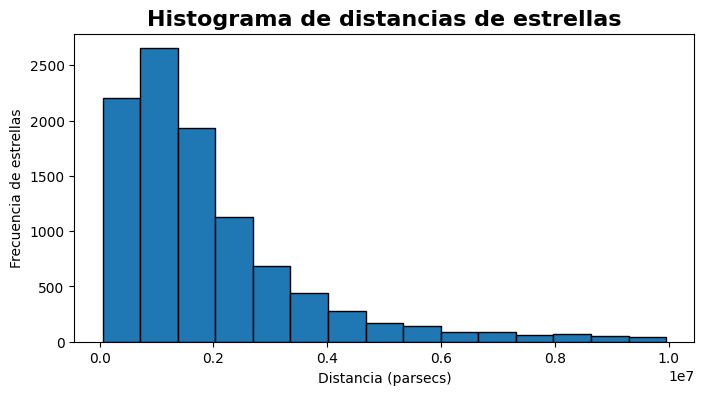

In [ ]:
distancias_filtradas = [d for d in distancias_validas if d < 1*10**7]
plt.figure(figsize=(8, 4))
plt.hist(distancias_filtradas, bins=15, edgecolor='black')
plt.xlabel('Distancia (parsecs)')
plt.ylabel('Frecuencia de estrellas')
plt.title('Histograma de distancias de estrellas', weight='bold', fontsize=16)
plt.show()

El histograma muestra que la mayoría de las estrellas observadas por GAIA se encuentran a distancias relativamente cercanas, dentro de unos pocos miles de parsecs. Esto indica que GAIA es más sensible a estrellas cercanas y que su capacidad para detectar estrellas disminuye a medida que aumenta la distancia.

En otras palabras, GAIA es muy bueno para observar estrellas en nuestra vecindad galáctica, pero su capacidad para observar objetos más distantes es limitada.

(d) (9 puntos) Por medio de la ecuación del módulo de la distancia, calcule las magnitudes absolutas de las estrellas en las bandas G y GRP.


In [ ]:
magnitudes_G , magnitudes_GRP = [] , []

for index, row in df.iterrows():
  if row['Distancia (parsecs)'] != 'NaN':
    #Magnitud en Banda G
    m = row['G (mag)']
    M = abs(m - 5 * np.log10(row['Distancia (parsecs)']) + 5)
    magnitudes_G.append(M)
    #Magnitud en banda GRP
    m2 = row['RP (mag)']
    M2 = abs(m2 - 5 * np.log10(row['Distancia (parsecs)']) + 5)
    magnitudes_GRP.append(M2)
  else:
    magnitudes_G.append('NaN')
    magnitudes_GRP.append('NaN')

df['Magnitud Absoluta G (mag)'] = magnitudes_G
df['Magnitud Absoluta GRP (mag)'] = magnitudes_GRP
df

,RA (grados),DEC (grados),Paralaje (mas),Mov propio RA (mas/año),Mov propio DEC (mas/año),G (mag),RP (mag),Radio (Rsun),Temperatura (K),Luminosidad (Lsun),...,AR corregido por Prec. y Nutación (grados),DEC corregido por Prec. y Nutación (grados),Mov Propio Total (mas/año),Mov Propio hasta 2122 en RA (grados),Mov Propio hasta 2122 en DEC (grados),"Correc. Final en RA - Prec., Nut. y Mov. Propio (grados)","Correc. Final en DEC - Prec., Nut. y Mov. Propio (grados)",Distancia (parsecs),Magnitud Absoluta G (mag),Magnitud Absoluta GRP (mag)
0,103.447529,56.022025,0.582790,6.040461,5.055291,15.770850,15.275072,1.024730,5807.0,1.075774,...,104.574415,55.475567,7.173295,0.000038,2.371998e-05,104.574454,55.475591,1715881.229711,10.401586,10.897364
1,105.187856,56.267982,1.385686,22.897881,-9.885237,13.252875,12.741846,1.388711,5779.0,1.937890,...,106.114482,56.659810,13.430742,0.000066,-3.229088e-07,106.114549,56.659809,721663.435633,11.038799,11.549828
2,103.424758,56.450903,0.314035,-4.521304,-5.547879,19.861720,18.830698,NaN,NaN,NaN,...,104.548912,55.906693,6.197641,0.000021,6.727584e-06,104.548934,55.906700,3184358.671413,7.65339,8.684412
3,105.049751,56.508777,1.939951,-2.566329,1.834169,20.511896,19.258364,NaN,NaN,NaN,...,105.903350,56.796596,2.065874,0.000025,1.865690e-05,105.903375,56.796615,515476.526763,3.049148,4.30268
4,103.352525,56.395144,0.747108,5.426702,-3.468109,14.344414,13.870882,1.507958,5867.0,2.427377,...,104.520343,55.832741,3.526546,0.000037,1.006845e-05,104.520381,55.832751,1338494.11162,11.288668,11.7622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14204,103.317124,56.619457,0.635295,1.347417,-1.942009,18.441875,17.846388,NaN,NaN,NaN,...,104.493159,56.054372,1.963396,0.000031,1.259360e-05,104.493190,56.054384,1574071.322927,7.543247,8.138734
14205,105.467759,56.261516,-5.242704,-0.084027,-2.525625,20.720303,NaN,NaN,NaN,NaN,...,106.520392,56.763096,2.526376,0.000029,1.155233e-05,106.520422,56.763108,NaN,NaN,NaN
14206,105.200935,56.399065,-0.339148,13.110889,-16.434445,19.104810,18.310467,NaN,NaN,NaN,...,106.116539,56.778164,16.618900,0.000050,-1.085569e-05,106.116590,56.778153,NaN,NaN,NaN
14207,103.574689,56.431876,1.992706,2.955513,0.105719,20.382227,19.382633,NaN,NaN,NaN,...,104.618886,55.932373,2.599524,0.000034,1.584614e-05,104.618919,55.932388,501829.823016,3.120555,4.120149



# 2.   Eclipses

Puntos 2.) a - e en el archivo de LateX adjunto.



(f) (20 puntos) En el 2022 se observaron en diferentes partes del mundo los
siguientes eclipses.

Estime las fechas y los tipos (solar o lunar) de eclipses que se darán en 2023.
*Ayuda: El periodo sinódico de la Luna es de 29d 12h 44m 03s.*


In [ ]:
data = {'Fecha': ['Abril 30', 'Mayo 15-16', 'Octubre 25', 'Noviembre 7-8'],
        'Tipo': ['Solar parcial', 'Lunar total', 'Solar parcial', 'Lunar total']}
df_eclipses = pd.DataFrame(data)
df_eclipses

,Fecha,Tipo
0,Abril 30,Solar parcial
1,Mayo 15-16,Lunar total
2,Octubre 25,Solar parcial
3,Noviembre 7-8,Lunar total


In [ ]:
#Definamos una función que encuentre la fecha juliana más cercana a las fechas que tenemos en temporada de eclipses de 2023 sumando múltiplos del periodo sinódico a las fechas iniciales
def fecha_cercana(JD_inicial, JD_TE):

  T_sinodico = 29 + 12/24 + 44/1440 + 3/86400 #Periodo sinódico de la Luna en días decimales
  multiplo = round((JD_TE - JD_inicial) / T_sinodico)
  return JD_inicial + multiplo * T_sinodico

# Fechas Julianas de las observaciones de eclipses en 2022
fechas_iniciales = [2460065, 2460080, 2460243, 2460256]

#Al dividir el periodo dracónico en 2 estamos obteniendo el periodo que tarda en pasar el Sol de un nodo a otro
T_S_nodos = 346/2

#Al sumar dicha cantidad de días a las fechas julianas iniciales, obtendremos fechas donde es posible asegurar que se encuentran en Temporada de Eclipses
fechas_TE_2023 = [fecha + T_S_nodos for fecha in fechas_iniciales]
fechas_predichas = []
# Calcula las fechas más cercanas para cada fecha inicial
for JD_inicial, JD_TE in zip(fechas_iniciales, fechas_TE_2023):
  fecha = int(fecha_cercana(JD_inicial, JD_TE))
  fechas_predichas.append(fecha)
print('Los días julianos en que se espera tener eclipses el año 2023 son:', fechas_predichas)

Los días julianos en que se espera tener eclipses el año 2023 son: [2460242, 2460257, 2460420, 2460433]


In [ ]:
#PREDICCIÓN DE ECLIPSES PARA 2023
fechas_predichas = ["Abril 19", "Mayo 2", "Octubre 24", "Noviembre 8"] #Fechas de los días julianos obtenidos
tipos = ["Solar", "Lunar", "Solar", "Lunar"]

df_predicciones = pd.DataFrame({"Fecha": fechas_predichas, "Tipo": tipos})

df_predicciones

,Fecha,Tipo
0,Abril 19,Solar
1,Mayo 2,Lunar
2,Octubre 24,Solar
3,Noviembre 8,Lunar
